In [68]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [71]:
credit_scoring = pd.read_csv("credit_scoring.csv", header=0, sep=";")

In [72]:
credit_scoring.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [75]:
print(credit_scoring.describe())
print(credit_scoring.shape)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
count,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000
mean,7.985143,0.528229,46.518857,37.021714,0.271086,1.172114,0.364114,55.595200,130.848914,5298.431314,342.551543,1037.463771,1459.732343,0.722057
std,8.173922,0.499260,14.619282,10.973187,0.444571,0.377523,0.481236,19.451569,86.199518,10582.377366,1217.622800,469.753531,621.775995,0.448036
min,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000,0.000000
25%,2.000000,0.000000,36.000000,28.000000,0.000000,1.000000,0.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1116.500000,0.000000
50%,5.000000,1.000000,48.000000,36.000000,0.000000,1.000000,0.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000,1.000000
75%,12.000000,1.000000,60.000000,45.000000,1.000000,1.000000,1.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1688.000000,1.000000
max,48.000000,1.000000,72.000000,68.000000,1.000000,2.000000,1.000000,173.000000,959.000000,250000.000000,30000.000000,4500.000000,11140.000000,1.000000


In [76]:
X = credit_scoring.iloc[:,:-1].values
Y = credit_scoring.iloc[:,-1].values
pourc_positif = np.sum(Y==1)/len(Y)
pour_negatif = np.sum(Y==0)/len(Y)
print('Pourcentage des bons payeurs:{:.2f}'.format(pourc_positif))

Pourcentage des bons payeurs:0.72


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

## Arbre de décision ##

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

DT = DecisionTreeClassifier(criterion='gini', random_state=1)
DT.fit(X_train, Y_train)
YDT = DT.predict(X_test)
print('Arbre de decision: Résultats')
print(confusion_matrix(Y_test, YDT))
print("Accuracy: {:.3f}".format(accuracy_score(Y_test, YDT)))
print("Precision: {:.3f}".format(precision_score(Y_test, YDT)))
print("The accuracy is the ratio (tp+tn)/total")
print("The precision is the ratio tp / (tp + fp). Ici permet de mesurer le nombre de bons clients sur nombre de bons clients + faux bons clients (20% de mauvais clients prédits bons, à éviter pour la banque) \n Le recall est le ratio  tp / (tp + fn), qui ici détermine le nombre de bons clients oubliés (classés comme mauvais). Ok ici on privilégie la precision qu'on veut au max")

Arbre de decision: Résultats
[[ 325  279]
 [ 318 1266]]
Accuracy: 0.727
Precision: 0.819
The accuracy is the ratio (tp+tn)/total
The precision is the ratio tp / (tp + fp). Ici permet de mesurer le nombre de bons clients sur nombre de bons clients + faux bons clients (20% de mauvais clients prédits bons, à éviter pour la banque 
 Le recall est le ratio  tp / (tp + fn), qui ici détermine le nombre de bons clients oubliés (classés comme mauvais). Ok ici on privilégie la precision qu'on veut au max


### K-NN ###

In [83]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)
YClust = neigh.predict(X_test)
print('KNN: Résultats')
print(confusion_matrix(Y_test, YClust))
print("Accuracy: {:.3f}".format(accuracy_score(Y_test, YClust)))
print("Precision: {:.3f}".format(precision_score(Y_test, YClust)))
print('Méthode non paramètrique comme le decision tree. La Precision obtenue est plus faible.')

KNN: Résultats
[[ 189  415]
 [ 187 1397]]
Accuracy: 0.725
Precision: 0.771
Méthode non paramètrique comme le decision tree. 


### MULTILAYER PERCEPTRON ###

In [84]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, hidden_layer_sizes = (40,20)).fit(X_train, Y_train)
Yclf = clf.predict(X_test)
print('MLP: Résultats')
print(confusion_matrix(Y_test, Yclf))
print("Accuracy: {:.3f}".format(accuracy_score(Y_test, Yclf)))
print("Precision: {:.3f}".format(precision_score(Y_test, Yclf)))
print("Un progrès sur la précision pour le perceptron à plusieurs couches avec la fonction d'activation Relu (positive part). Optimiseur utilisé est adam par défaut. On a une plus mauvaise accuracy mais on accepte moins de mauvais clients")

MLP: Résultats
[[ 402  202]
 [ 525 1059]]
Accuracy: 0.668
Precision: 0.840


### NORMALISATION DES DONNES ###

In [88]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
print("Any machine learning algorithm that computes the distance between the data points needs Feature Scaling (Standardization and Normalization). This includes all curve based algorithms.")
SS = StandardScaler()
SS.fit(X_train)
X_trainnorm = SS.transform(X_train)
X_testnorm = SS.transform(X_test)
MM = MinMaxScaler()
MM.fit(X_train)
X_train_MM = MM.transform(X_train)
X_test_MM = MM.transform(X_test)

Any machine learning algorithm that computes the distance between the data points needs Feature Scaling (Standardization and Normalization). This includes all curve based algorithms.


In [89]:
def classifieurs(X_train, Y_train, X_test, Y_test):
    DT = DecisionTreeClassifier(criterion='gini', random_state=1)
    DT.fit(X_train, Y_train)
    YDT = DT.predict(X_test)
    print('### Arbre de decision: Résultats ###')
    print(confusion_matrix(Y_test, YDT))
    print("Accuracy: {:.3f}".format(accuracy_score(Y_test, YDT)))
    print("Precision: {:.3f} \n".format(precision_score(Y_test, YDT)))
    neigh = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)
    YClust = neigh.predict(X_test)
    print('### KNN: Résultats ###')
    print(confusion_matrix(Y_test, YClust))
    print("Accuracy: {:.3f}".format(accuracy_score(Y_test, YClust)))
    print("Precision: {:.3f} \n".format(precision_score(Y_test, YClust)))
    clf = MLPClassifier(random_state=1, hidden_layer_sizes = (40,20)).fit(X_train, Y_train)
    Yclf = clf.predict(X_test)
    print('### MLP: Résultats ###')
    print(confusion_matrix(Y_test, Yclf))
    print("Accuracy: {:.3f}".format(accuracy_score(Y_test, Yclf)))
    print("Precision: {:.3f} \n".format(precision_score(Y_test, Yclf)))

In [91]:
print("Test avec les données normalisées par StandardScaler (on enleve la moyenne puis divise par l'écart type")
classifieurs(X_trainnorm, Y_train, X_testnorm, Y_test)
print("Test avec les données normalisées par MinMAx (abs(Xmax-X / Xmax-Xmin)):" )
classifieurs(X_train_MM, Y_train, X_test_MM, Y_test)

Test avec les données normalisées par StandardScaler (on enleve la moyenne puis divise par l'écart type
### Arbre de decision: Résultats ###
[[ 322  282]
 [ 315 1269]]
Accuracy: 0.727
Precision: 0.818 

### KNN: Résultats ###
[[ 286  318]
 [ 223 1361]]
Accuracy: 0.753
Precision: 0.811 

### MLP: Résultats ###
[[ 342  262]
 [ 227 1357]]
Accuracy: 0.777
Precision: 0.838 

Test avec les données normalisées par MinMAx (abs(Xmax-X / Xmax-Xmin)):
### Arbre de decision: Résultats ###
[[ 325  279]
 [ 315 1269]]
Accuracy: 0.729
Precision: 0.820 

### KNN: Résultats ###
[[ 283  321]
 [ 236 1348]]
Accuracy: 0.745
Precision: 0.808 

### MLP: Résultats ###
[[ 321  283]
 [ 179 1405]]
Accuracy: 0.789
Precision: 0.832 

Interprétation: 


## Interprétation ##
### Comparaison avec les résultats des données non processées ###
* Arbre de décision: pas d'amélioration (résultat attendu car ne se base pas sur une mesure de distance)
* KNN: Gain de 3% de précision pour les deux méthodes de normalisation (attendu car se base que sur les distances)
* MLP: pas de gain substantiel en precision, mais en accuracy (méthode d'optimisation par gradient de fonctions, permet d'avoir des pas en direction (opposée) du gradient à chaque itération plus équilibrés?)


## Combinaison linéaire des variables initiales ##

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_trainnorm)
X_trainpca = np.concatenate((X_trainnorm, pca.transform(X_trainnorm)),axis=1)
X_testpca = np.concatenate((X_testnorm, pca.transform(X_testnorm)), axis=1)

In [95]:
classifieurs(X_trainpca, Y_train, X_testpca, Y_test)
print("L'arbre de décision devient l'algorithme discriminant avec la plus haute précision \n Les vecteurs propres de l'ACP ont permis de donner de nouvelles règles de décisions + tranchantes à l'arbre (n'affecte pas les deux autres algorithmes positivement en précision")

### Arbre de decision: Résultats ###
[[ 351  253]
 [ 324 1260]]
Accuracy: 0.736
Precision: 0.833 

### KNN: Résultats ###
[[ 283  321]
 [ 212 1372]]
Accuracy: 0.756
Precision: 0.810 

### MLP: Résultats ###
[[ 318  286]
 [ 217 1367]]
Accuracy: 0.770
Precision: 0.827 

L'arbre de décision devient l'algorithme discriminant avec la plus haute précision 
 Les vecteurs propres de l'ACP ont permis de donner de nouvelles règles de décisions + tranchantes à l'arbre


## QUESTION 5: Selection de variables ##

(13,)
Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


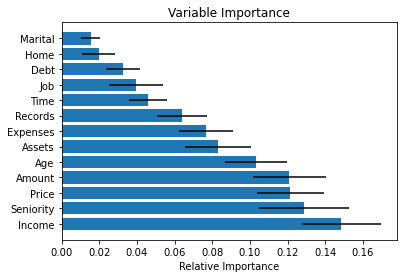

In [96]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_trainnorm, Y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
print(std.shape)
sorted_idx = np.argsort(importances)[::-1]
features =credit_scoring.columns[:-1]
print(features[sorted_idx])
padding = np.arange(X_trainnorm.size/len(X_trainnorm)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

Selection de variables pour le K-NN


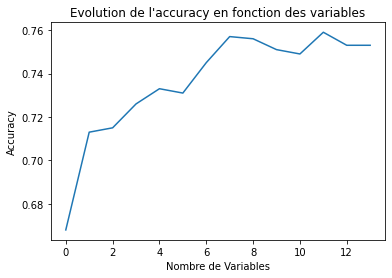

11 variables semblent être le meilleur choix pour notre KNN, 7 si on veut economiser du temps d'optimisation par rapport au faible gain d'accuracy entre 7 et 11 variables sélectionnées


In [99]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(X_trainnorm.shape[1]+1)
for f in np.arange(0, X_trainnorm.shape[1]+1):
    X1_f = X_trainnorm[:,sorted_idx[:f+1]]
    X2_f = X_testnorm[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,Y_train)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(accuracy_score(Y_test,YKNN),3)
print("Selection de variables pour le K-NN")
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()
print("12 variables semblent être le meilleur choix pour notre KNN, 8 si on veut economiser du temps d'optimisation par rapport au faible gain d'accuracy entre 8 et 12 variables sélectionnées (on commecne la graduation des features à 0")

Selection de variables pour le MLP


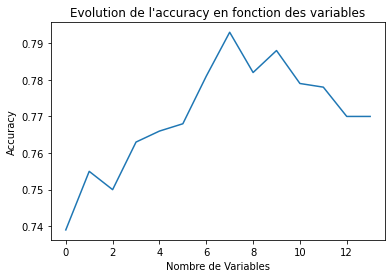

7 variables semblent être le meilleur choix pour notre MLP


In [101]:
MLP = MLPClassifier(random_state=1, hidden_layer_sizes = (40,20))
scores=np.zeros(X_trainnorm.shape[1]+1)
for f in np.arange(0, X_trainnorm.shape[1]+1):
    X1_f = X_trainnorm[:,sorted_idx[:f+1]]
    X2_f = X_testnorm[:,sorted_idx[:f+1]]
    MLP.fit(X1_f,Y_train)
    YMLP = MLP.predict(X2_f)
    scores[f]=np.round(accuracy_score(Y_test,YMLP),3)
print("Selection de variables pour le MLP")
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()
print("8 variables semblent être le meilleur choix pour notre MLP, attention on commence à 0 notre graduation des features")

In [106]:
indices_var = sorted_idx[:(np.argmax(scores)+1)]
print(indices_var)
print(features[indices_var])

[ 8  0 12 11  3  9  7  5]
Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records'],
      dtype='object')


### Paramétrage des classifieurs ###

In [107]:
from sklearn.model_selection import GridSearchCV
print('Utilisation de GridSearch sur le MLP avec 8 features sélectionnées par la question précédente')
parameters_MLP = {'hidden_layer_sizes':[(40,20), (30,20), (40,30)], 'activation':['logistic', 'tanh', 'relu']}
modelMLP = MLPClassifier(random_state=1)
GSMLP = GridSearchCV(modelMLP, parameters_MLP, scoring='accuracy', cv=10)
grille = GSMLP.fit(X_trainnorm[:,indices_var], Y_train)
print('Les meilleurs paramètres trouvés par le grid search sont: {}.\n La sélection est basée sur l accuracy: le meilleur score obtenu est {:.3f}  sur la base de training. qui ne permet pas d améliorer celle obtenue précedemment avec la totalité des features mais moins de paramètres pour le réseau neuronal car espace de features à plus faible dimension'.format(grille.best_params_, grille.best_score_))

{'activation': 'logistic', 'hidden_layer_sizes': (40, 30)}
0.7809748230069958


In [110]:
YMLP_grid = grille.predict(X_testnorm[:,indices_var])
print("Accuracy score d'un MLP optimisé: {0:.3f}. \n Le Gridsearch permet d améliorer légèrement l accuracy obtenue précedemment par le MLP en utilisant un espace de features à plus faible dimension, mais plus de neurones au final (ici (40,30)) au lieu de (40,20)".format(accuracy_score(Y_test, YMLP_grid)))

Accuracy score d'un MLP optimisé: 0.797. 
 Le Gridsearch permet d améliorer légèrement l accuracy obtenue précedemment en utilisant un espace de features à plus faible dimension, mais plus de neurones au final (ici (40,30)) au lieu de (40,20)


### QUESTION 7: CREATION DE PIPELINE ###

In [111]:
from sklearn.pipeline import Pipeline
import pickle

In [115]:
P = Pipeline([('SS', StandardScaler()),
              ('Mon_ACP', PCA(n_components=3)),
             ('MLP', MLPClassifier(random_state=1, activation='logistic', hidden_layer_sizes=(40,30)))])
P.fit(X_train,Y_train)
pickle.dump(P, open("/Users/theophilebaggio/Desktop/studies/Lyon_M2_SITN/Machine_learning/TP_SL/pipeline_bank.pkl", "wb"))

In [116]:
P = pickle.load(open("/Users/theophilebaggio/Desktop/studies/Lyon_M2_SITN/Machine_learning/TP_SL/pipeline_bank.pkl", "rb"))

In [117]:
P.predict_proba(X_test)

array([[0.42513176, 0.57486824],
       [0.45302441, 0.54697559],
       [0.27883085, 0.72116915],
       [0.11751453, 0.88248547],
       [0.40041915, 0.59958085],
       [0.27615809, 0.72384191],
       [0.39969118, 0.60030882],
       [0.22638328, 0.77361672],
       [0.29059809, 0.70940191],
       [0.48226671, 0.51773329],
       [0.49825523, 0.50174477],
       [0.16413477, 0.83586523],
       [0.23585519, 0.76414481],
       [0.1727642 , 0.8272358 ],
       [0.32610549, 0.67389451],
       [0.1514369 , 0.8485631 ],
       [0.37369904, 0.62630096],
       [0.45893976, 0.54106024],
       [0.37893427, 0.62106573],
       [0.16761906, 0.83238094],
       [0.10479678, 0.89520322],
       [0.19651952, 0.80348048],
       [0.23696912, 0.76303088],
       [0.367616  , 0.632384  ],
       [0.37752811, 0.62247189],
       [0.44693295, 0.55306705],
       [0.17538509, 0.82461491],
       [0.18256228, 0.81743772],
       [0.22351516, 0.77648484],
       [0.11609876, 0.88390124],
       [0.

## Comparaison de plusieurs algorithmes d’apprentissage ##

In [121]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score
from sklearn.model_selection import KFold, cross_validate



def run_classifiers(clfs, X, Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    for i in clfs:
        clf = clfs[i]
        cv_scores = cross_validate(clf, X, Y, scoring=('accuracy', 'precision'), cv=kf)
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_scores['test_accuracy']), np.std(cv_scores['test_accuracy'])))
        print("Precision for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_scores['test_precision']), np.std(cv_scores['test_precision'])))
        print("Temps de fitting de données par l'algorithme d'apprentissage {0} en moyenne: {1:.3f} +/- {2:.3f} secondes"
              .format(i, np.mean(cv_scores['fit_time']), np.std(cv_scores['fit_time'])))


clfs = {
    'NB': GaussianNB(),
    'CART': DecisionTreeClassifier(criterion='gini',random_state=1),
    'ID3': DecisionTreeClassifier(criterion='entropy', random_state=1),
    'Stump': DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=1),
    'MLP': MLPClassifier(random_state=1, hidden_layer_sizes = (20,10)),
    'KNN': KNeighborsClassifier(n_neighbors=13),
    "BC": BaggingClassifier(n_estimators=100, random_state=1),
    'ADA': AdaBoostClassifier(n_estimators=100, random_state=1),
    'RF': RandomForestClassifier(n_estimators=100, random_state=1),
    'GB': GradientBoostingClassifier(n_estimators=100, random_state=1)
}

run_classifiers(clfs, X, Y)

Accuracy for NB is: 0.773 +/- 0.018
Precision for NB is: 0.830 +/- 0.025
Temps de fitting de données par l'algorithme d'apprentissage NB en moyenne: 0.003 +/- 0.002 secondes
Accuracy for CART is: 0.721 +/- 0.016
Precision for CART is: 0.809 +/- 0.017
Temps de fitting de données par l'algorithme d'apprentissage CART en moyenne: 0.029 +/- 0.006 secondes
Accuracy for ID3 is: 0.714 +/- 0.015
Precision for ID3 is: 0.800 +/- 0.018
Temps de fitting de données par l'algorithme d'apprentissage ID3 en moyenne: 0.041 +/- 0.017 secondes
Accuracy for Stump is: 0.725 +/- 0.019
Precision for Stump is: 0.743 +/- 0.034
Temps de fitting de données par l'algorithme d'apprentissage Stump en moyenne: 0.005 +/- 0.002 secondes
Accuracy for MLP is: 0.699 +/- 0.070
Precision for MLP is: 0.830 +/- 0.043
Temps de fitting de données par l'algorithme d'apprentissage MLP en moyenne: 1.059 +/- 0.323 secondes
Accuracy for KNN is: 0.731 +/- 0.016
Precision for KNN is: 0.761 +/- 0.018
Temps de fitting de données par l'

### Comparaison des algorithmes: ###
Ici les algorithmes de bagging, adaboost, random_forest et gradientboost ont été testé avec 50 estimateurs puis 100 estimateurs. Les résultats n'ont pas changé en terme d'accuracy et precision, augmenté en terme de temps de fitting.
* L'algorithme qui a la meilleur accuracy par cette cross-validation est le gradient boosting algorithme, suivi par adaboost, bagging classifier random forest  de (79% à 78%) et le naive bayes à 77%.
* L'algorithme qui a la meilleur precision par cross-validation est le multilayer perceptron, alors qu'il a une accuracy très basse,  et le naive bayes qui a un écart type plus bas..!.
* Le plus rapide pour fitter les données est le k-NN, ainsi que le naive bayes (MLP est 1000 plus lent) <br/>
Alors le meilleur algo est le naive bayes ici! avant d'implémenter de fancy algorithmes, trouver une baseline à battre avec un naive bayes par exemple peut être une bonne pratique et éviter perte de temps!


# FIN DE LA PARTIE 1 #

# Partie 3 #

In [53]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

In [38]:
df_text = pd.read_table("SMSSpamCollection", header=None)
df_text.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
vectorizer = CountVectorizer(max_features=300, stop_words='english')
X = vectorizer.fit_transform(df_text[1])
Y = df_text[0].values
Y[Y=="ham"] = 0
Y[Y=="spam"] = 1
Y = Y.astype(int)
#nbspam etc

In [58]:
X_train,  X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [55]:
vectorizer.vocabulary_

{'great': 102,
 'world': 291,
 'got': 101,
 'wat': 275,
 'ok': 185,
 'lar': 133,
 'free': 90,
 'win': 283,
 'text': 240,
 'receive': 208,
 'txt': 263,
 'rate': 203,
 'apply': 18,
 'dun': 77,
 'say': 216,
 'early': 79,
 'don': 74,
 'think': 248,
 'hey': 116,
 'week': 279,
 'word': 288,
 'like': 143,
 'fun': 94,
 'xxx': 293,
 'send': 218,
 '50': 10,
 'speak': 231,
 'friends': 92,
 'network': 176,
 'customer': 59,
 'selected': 217,
 'prize': 199,
 'claim': 47,
 'code': 49,
 'mobile': 170,
 'latest': 136,
 'camera': 40,
 'gonna': 99,
 'home': 119,
 'soon': 229,
 'want': 274,
 'talk': 238,
 'stuff': 235,
 'tonight': 257,
 've': 268,
 'today': 253,
 'cash': 43,
 '100': 2,
 '000': 0,
 'cost': 57,
 '150p': 4,
 'day': 63,
 '16': 6,
 'reply': 210,
 'urgent': 266,
 'won': 286,
 'www': 292,
 'right': 211,
 'thank': 242,
 'wont': 287,
 'help': 115,
 'use': 267,
 'message': 163,
 'com': 51,
 'oh': 184,
 'watching': 277,
 'remember': 209,
 'yes': 297,
 'did': 67,
 'make': 158,
 'fine': 87,
 'way': 27

In [52]:
classifieurs(X_train, Y_train, X_test, Y_test)

### Naive Bayes Classifier: Résultats ###
[[1450    2]
 [  32  188]]
Accuracy: 0.980
Precision: 0.989 

### Arbre de decision: Résultats ###
[[1429   23]
 [  33  187]]
Accuracy: 0.967
Precision: 0.890 

### ID3: Résultats ###
[[1435   17]
 [  35  185]]
Accuracy: 0.969
Precision: 0.916 

### Decision stump: Résultats ###
[[1385   67]
 [ 127   93]]
Accuracy: 0.884
Precision: 0.581 

### MLP: Résultats ###
[[1451    1]
 [  33  187]]
Accuracy: 0.980
Precision: 0.995 

### KNN: Résultats ###
[[1452    0]
 [ 137   83]]
Accuracy: 0.918
Precision: 1.000 

### BAGGING: Résultats ###
[[1452    0]
 [  50  170]]
Accuracy: 0.970
Precision: 1.000 

### ADABOOST: Résultats ###
[[1442   10]
 [  36  184]]
Accuracy: 0.972
Precision: 0.948 

### RandomForestClassifier: Résultats ###
[[1442   10]
 [  36  184]]
Accuracy: 0.972
Precision: 0.948 



In [64]:
TFIDF = TfidfTransformer()
TFIDF.fit(X)
X_TFIDF = TFIDF.transform(X)
X_train,  X_test, Y_train, Y_test = train_test_split(X_TFIDF, Y, test_size = 0.3)

In [65]:
classifieurs(X_train, Y_train,  X_test, Y_test)

### Naive Bayes Classifier: Résultats ###
[[1421    9]
 [  34  208]]
Accuracy: 0.974
Precision: 0.959 

### Arbre de decision: Résultats ###
[[1409   21]
 [  39  203]]
Accuracy: 0.964
Precision: 0.906 

### ID3: Résultats ###
[[1410   20]
 [  48  194]]
Accuracy: 0.959
Precision: 0.907 

### Decision stump: Résultats ###
[[1428    2]
 [ 200   42]]
Accuracy: 0.879
Precision: 0.955 

### MLP: Résultats ###
[[1415   15]
 [  33  209]]
Accuracy: 0.971
Precision: 0.933 

### KNN: Résultats ###
[[1421    9]
 [ 108  134]]
Accuracy: 0.930
Precision: 0.937 

### BAGGING: Résultats ###
[[1422    8]
 [  39  203]]
Accuracy: 0.972
Precision: 0.962 

### ADABOOST: Résultats ###
[[1421    9]
 [  50  192]]
Accuracy: 0.965
Precision: 0.955 

### RandomForestClassifier: Résultats ###
[[1421    9]
 [  50  192]]
Accuracy: 0.965
Precision: 0.955 



In [67]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=50)
SVD.fit(X_TFIDF)
X_SVD = SVD.transform(X_TFIDF)
X_train,  X_test, Y_train, Y_test = train_test_split(X_SVD, Y, test_size = 0.3)
classifieurs(X_train, Y_train,  X_test, Y_test)

### Naive Bayes Classifier: Résultats ###
[[1387   58]
 [  56  171]]
Accuracy: 0.932
Precision: 0.747 

### Arbre de decision: Résultats ###
[[1400   45]
 [  53  174]]
Accuracy: 0.941
Precision: 0.795 

### ID3: Résultats ###
[[1409   36]
 [  47  180]]
Accuracy: 0.950
Precision: 0.833 

### Decision stump: Résultats ###
[[1445    0]
 [ 227    0]]
Accuracy: 0.864
Precision: 0.000 

### MLP: Résultats ###
[[1426   19]
 [  29  198]]
Accuracy: 0.971
Precision: 0.912 

### KNN: Résultats ###
[[1426   19]
 [  51  176]]
Accuracy: 0.958
Precision: 0.903 

### BAGGING: Résultats ###
[[1429   16]
 [  36  191]]
Accuracy: 0.969
Precision: 0.923 

### ADABOOST: Résultats ###
[[1427   18]
 [  42  185]]
Accuracy: 0.964
Precision: 0.911 

### RandomForestClassifier: Résultats ###
[[1427   18]
 [  42  185]]
Accuracy: 0.964
Precision: 0.911 

